In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM

In [39]:
# Load the dataset
file_name = "2_Q.xlsx"
df = pd.read_excel(file_name)

# Preprocess the data
X = df[['Precipitation', 'Airtemp']]  # Features
y = df['swe']  # Target

# Handle missing values
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)

imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Normalize the features
X_scaled = (X_imputed - X_imputed.mean(axis=0)) / X_imputed.std(axis=0)

# Define the sequence length (number of time steps)
sequence_length = 5  

# Reshape the data for CNN
X_reshaped = []
y_reshaped = []
for i in range(len(X_scaled) - sequence_length + 1):
    X_reshaped.append(X_scaled[i:i + sequence_length])
    y_reshaped.append(y_imputed[i + sequence_length - 1])

X_reshaped = np.array(X_reshaped)
y_reshaped = np.array(y_reshaped)

# Split the data into training and testing sets
split_index = int(0.8 * len(X_reshaped))
X_train, X_test = X_reshaped[:split_index], X_reshaped[split_index:]
y_train, y_test = y_reshaped[:split_index], y_reshaped[split_index:]


In [40]:
# Define the model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])


c:\Users\pkaur\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [41]:
# Define the model
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    LSTM(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_lstm_history = cnn_lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

# Evaluate the model
cnn_lstm_loss = cnn_lstm_model.evaluate(X_test, y_test)
print("CNN-LSTM Model MSE:", cnn_lstm_loss)
mse= cnn_lstm_loss

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9500  
CNN-LSTM Model MSE: 2.82832407951355


In [42]:
mse= cnn_lstm_loss

y_pred = cnn_lstm_model.predict(X_test)

#Ensure y_test and y_pred are 1-dimensional arrays
y_test_flat = np.ravel(y_test)
y_pred_flat = np.ravel(y_pred)

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Text(0.5, 1.0, 'Garita Peak')

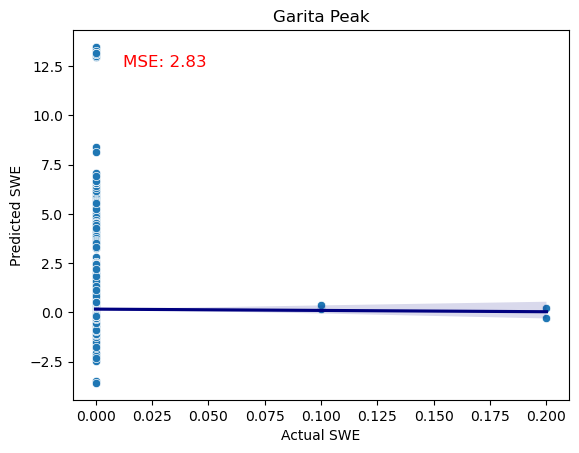

In [43]:
plot_data = pd.DataFrame({'Actual SWE': y_test_flat, 'Predicted SWE': y_pred_flat})
sns.scatterplot(data=plot_data,x='Actual SWE', y='Predicted SWE')
sns.regplot(data=plot_data, x='Actual SWE', y='Predicted SWE', scatter=False, color='navy')
plt.text(0.1, 0.9, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')
plt.title('Garita Peak')